Dependencies used: yfinance, numpy, pandas, matplotlib

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Question 1: Stock Price Analysis
 Downloading AAPL stock data from 11th December 2023 to 10th December 2024.\
 Then extracting closing prices from it and storing closing price vs date in a dataframe. \
 (Note that here 'Date' is an index column, its not a seperate column by itself)



In [2]:
data = yf.download('AAPL', start='2023-12-11', end='2024-12-11',interval='1d')
closing_vs_date = data[['Close']]

[*********************100%%**********************]  1 of 1 completed


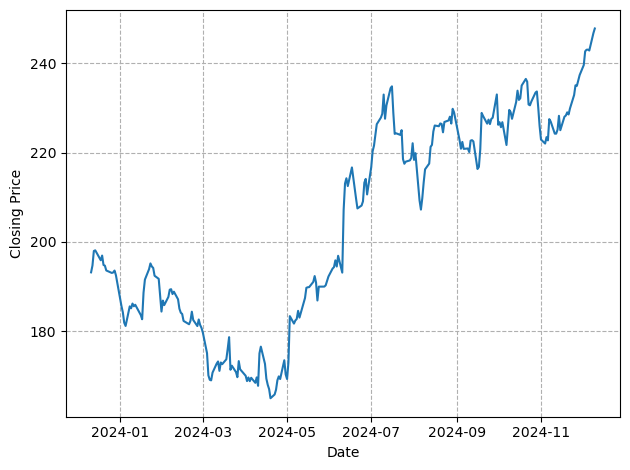

In [3]:
plt.plot(closing_vs_date.index, closing_vs_date['Close'])
plt.grid(True, linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

In [4]:
min_date = closing_vs_date['Close'].idxmin()
min_price = closing_vs_date.loc[min_date, 'Close']
print(f"Date of minima: {min_date}, minimum price: {min_price}")

max_date = closing_vs_date['Close'].idxmax()
max_price = closing_vs_date.loc[max_date, 'Close']
print(f"Date of maxima: {max_date}, maximum price: {max_price}")


Date of minima: 2024-04-19 00:00:00, minimum price: 165.0
Date of maxima: 2024-12-10 00:00:00, maximum price: 247.77000427246094


The stock shows a general uptrend over the past one year, with it starting close to 200 in december 2023, and reaching close to 250 in a period of one year. It reaches a local minima of 165 on 19th April. Maximum price in this interval is reached at the end of it, ie on 12th December, with a max price of 248.


# Question 2: Portfolio Return Calculation

Stocks chosen: tesla, (TSLA), amazon (AMZN), microsoft (MSFT).\
period of time: 1st May 2024 to 1st November 2024.\
weights assigned in portfolio: 0.33, (equal weights for all 3 stocks)

In [5]:
tesla = yf.download('TSLA', start='2024-05-01', end='2024-11-01', interval='1d')
amazon = yf.download('AMZN',start='2024-05-01', end='2024-11-01', interval='1d')
microsoft = yf.download('MSFT', start='2024-05-01', end='2024-11-01', interval='1d')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Now, creating a main dataframe to track how the portfolio is doing in general:

In [6]:
main = pd.concat([tesla['Close'], amazon['Close'], microsoft['Close']],axis=1)
main.columns = ['TSLA Close', 'AMZN Close', 'MSFT Close']

Now, we add three columns with the daily returns of each stock in the dataframe

In [7]:
tesla_returns = [None] #i guess first row will be empty while calculating returns
for i in range(1,len(main)):
    current = float(main.iloc[i]['TSLA Close'])
    previous = float(main.iloc[i-1]['TSLA Close'])
    daily_returns = round((current - previous) / previous, 3)
    tesla_returns.append(daily_returns)
    
amazon_returns = [None]
for j in range(1,len(main)):
    current = float(main.iloc[j]['AMZN Close'])
    previous = float(main.iloc[j-1]['AMZN Close'])
    daily_returns = round((current - previous) / previous, 3)
    amazon_returns.append(daily_returns)
    
microsoft_returns = [None]
for k in range(1,len(main)):
    current = float(main.iloc[k]['MSFT Close'])
    previous = float(main.iloc[k-1]['MSFT Close'])
    daily_returns = round((current - previous) / previous, 3)
    microsoft_returns.append(daily_returns)
    

main['TSLA Daily'] = tesla_returns
main['AMZN Daily'] = amazon_returns
main['MSFT Daily'] = microsoft_returns
main = main[['TSLA Close', 'TSLA Daily', 'AMZN Close', 'AMZN Daily', 'MSFT Close', 'MSFT Daily' ]]

Now, we add a portfolio return column, which is a weighted average of the daily returns of each stock

In [8]:
#weights are equal as given in the question
w1 = float(1/3)
w2 = float(1/3)
w3 = float(1/3)

portfolio_returns = [None]
for i in range(1,len(main)):
    ret_1 = main.iloc[i]['TSLA Daily']
    ret_2 = main.iloc[i]['AMZN Daily']
    ret_3 = main.iloc[i]['MSFT Daily']
    ret = round(((w1*ret_1) + (w2*ret_2) + (w3*ret_3)) / (w1+w2+w3),3)
    portfolio_returns.append(ret)

main['Portfolio Daily'] = portfolio_returns
main

,TSLA Close,TSLA Daily,AMZN Close,AMZN Daily,MSFT Close,MSFT Daily,Portfolio Daily
Date,,,,,,,
2024-05-01,179.990005,NaN,179.000000,NaN,394.940002,NaN,NaN
2024-05-02,180.009995,0.000,184.720001,0.032,397.839996,0.007,0.013
2024-05-03,181.190002,0.007,186.210007,0.008,406.660004,0.022,0.012
2024-05-06,184.759995,0.020,188.699997,0.013,413.540009,0.017,0.017
2024-05-07,177.809998,-0.038,188.759995,0.000,409.339996,-0.010,-0.016
...,...,...,...,...,...,...,...
2024-10-25,269.190002,0.033,187.830002,0.008,428.149994,0.008,0.016
2024-10-28,262.510010,-0.025,188.389999,0.003,426.589996,-0.004,-0.009
2024-10-29,259.519989,-0.011,190.830002,0.013,431.950012,0.013,0.005


Now, we shall calculate the overall returns of the portfolio after the period of 6 months, we shall graph the daily returns of the portfolio over time, and also give some insiight on the overall returns of each stock individually.

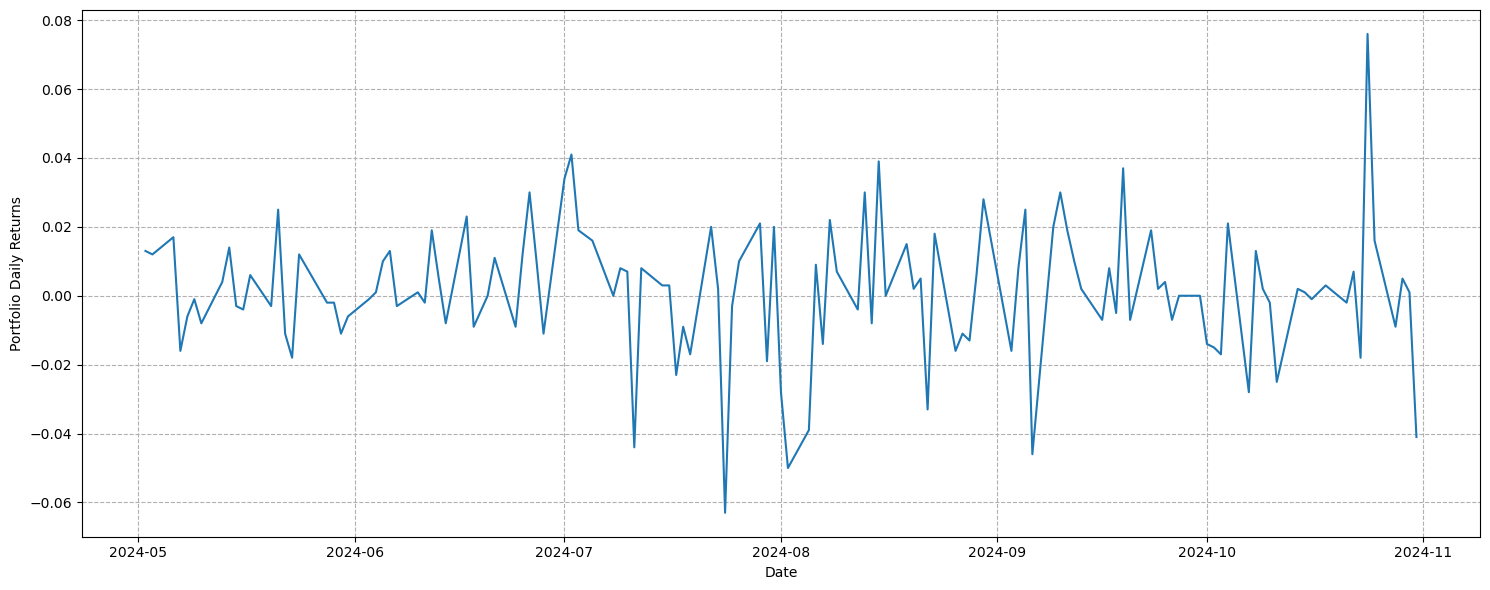

The overall returns of the investment over 6 months are: -0.041
Final value of the portfolio at the end of 6 months: 9590.0

The investment of 10000 resulted in a LOSS of 410.0!

The investment of 3333.333333333333 resulted in a LOSS of 99.99999999999999!

The investment of 3333.333333333333 resulted in a LOSS of 110.0!

The investment of 3333.333333333333 resulted in a LOSS of 203.33333333333331!



In [9]:
plt.figure(figsize=(15, 6))
plt.plot(main.index, main['Portfolio Daily'])
plt.grid(True, linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Portfolio Daily Returns')
plt.tight_layout()
plt.show()

#overall returns
total_capital = 10000
overall = main.iloc[-1]['Portfolio Daily']
print(f"The overall returns of the investment over 6 months are: {overall}")
print(f"Final value of the portfolio at the end of 6 months: {total_capital*(1+overall)}")
print()
if overall < 0:
    print(f"The investment of {total_capital} resulted in a LOSS of {abs(total_capital*overall)}!")
elif overall > 0:
    print(f"The investment of {total_capital} resulted in a PROFIT of {abs(total_capital*overall)}!")
else:
    print("Mere code mein error ho nhi sakta")

print()

#individual returns
tsla_capital = w1*total_capital
tsla_overall = main.iloc[-1]['TSLA Daily']
amzn_capital = w2*total_capital
amzn_overall = main.iloc[-1]['AMZN Daily']
msft_capital = w3*total_capital
msft_overall = main.iloc[-1]['MSFT Daily']

if tsla_overall < 0:
    print(f"The investment of {tsla_capital} resulted in a LOSS of {abs(tsla_capital*tsla_overall)}!")
elif tsla_overall > 0:
    print(f"The investment of {tsla_capital} resulted in a PROFIT of {abs(tsla_capital*tsla_overall)}!")
print()
if amzn_overall < 0:
    print(f"The investment of {amzn_capital} resulted in a LOSS of {abs(amzn_capital*amzn_overall)}!")
elif amzn_overall > 0:
    print(f"The investment of {amzn_capital} resulted in a PROFIT of {abs(amzn_capital*amzn_overall)}!")
print()
if msft_overall < 0:
    print(f"The investment of {msft_capital} resulted in a LOSS of {abs(msft_capital*msft_overall)}!")
elif msft_overall > 0:
    print(f"The investment of {msft_capital} resulted in a PROFIT of {abs(msft_capital*msft_overall)}!")
print()

hmm guess i couldve chosen better stocks... 

# Question 3: Portfolio Analysis Function 

creating the 'analyse_portfolio' function as given in the ps: \
(used the ipython display module to display instead of print, looks nicer)

In [10]:
from IPython.display import display
pd.set_option('display.width', 1000)     
pd.set_option('display.max_columns', None)

tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA']
weights = [0.3, 0.2, 0.2, 0.2, 0.1]
start_date = '2023-01-01'
end_date = '2023-12-31'

dataframes = {} #maps each ticker to individual data from yfinance
wts = {} #maps each ticker to weight assigned to it
finaldf = pd.DataFrame()

def analyse_portfolio(tickers, weights, start_date, end_date,capital):
    for ticker in tickers:
        dat = yf.download(ticker, start=start_date, end=end_date, interval='1d')
        dataframes[ticker] = dat
        wts[ticker] = weights[tickers.index(ticker)]
    
    
    for ticker, dataframe in dataframes.items():
        daily = [None]
        for i in range(1,len(dataframe)):
            now = dataframe.iloc[i]['Close']
            prev = dataframe.iloc[i-1]['Close']
            ret = round((now - prev) / prev, 3)
            daily.append(ret)
        dataframe['Daily Returns'] = daily
        
        
        finaldf[str(ticker)+'_Close'] = round(dataframe['Close'],3)
        finaldf[str(ticker)+'_Daily'] = dataframe['Daily Returns']
        
    port_ret = [None]    
    s  = sum(weights)
    for i in range(1,len(finaldf)):
        num = 0
        for ticker, weight in wts.items():
            num += weight * (finaldf.iloc[i][str(ticker)+'_Daily'])
        port_ret.append(num/s)
    finaldf['Portfolio Returns'] = port_ret
   
    
    overall_returns = finaldf.iloc[-1]['Portfolio Returns']
    final_value = capital*(1+overall_returns)
    print(f"The investment of {capital} amounts to {final_value} at the end of the given period.")
    
    return final_value
    



analyse_portfolio(
    tickers = tickers,
    weights = weights,
    start_date=start_date,
    end_date=end_date,
    capital = 100000
)      

display(finaldf.head())   

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
The investment of 100000 amounts to 99430.0 at the end of the given period.


,AAPL_Close,AAPL_Daily,MSFT_Close,MSFT_Daily,GOOGL_Close,GOOGL_Daily,TSLA_Close,TSLA_Daily,NVDA_Close,NVDA_Daily,Portfolio Returns
Date,,,,,,,,,,,
2023-01-03,125.07,NaN,239.58,NaN,89.12,NaN,108.10,NaN,14.315,NaN,NaN
2023-01-04,126.36,0.010,229.10,-0.044,88.08,-0.012,113.64,0.051,14.749,0.030,0.0050
2023-01-05,125.02,-0.011,222.31,-0.030,86.20,-0.021,110.34,-0.029,14.265,-0.033,-0.0226
2023-01-06,129.62,0.037,224.93,0.012,87.34,0.013,113.06,0.025,14.859,0.042,0.0253
2023-01-09,130.15,0.004,227.12,0.010,88.02,0.008,119.77,0.059,15.628,0.052,0.0218


## Bonus: (Portfolio Comparision)
We shall use the function defined above to compare two portfolios with the following weights assigned: (keeping stocks the same).\
weights_1 = [0.3, 0.2, 0.2, 0.2, 0.1]\
weights_2 = [0.4, 0.1, 0.15, 0.15, 0.2]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
The investment of 100000 amounts to 99430.0 at the end of the given period.
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
The investment of 100000 amounts to 98445.0 at the end of the given period.


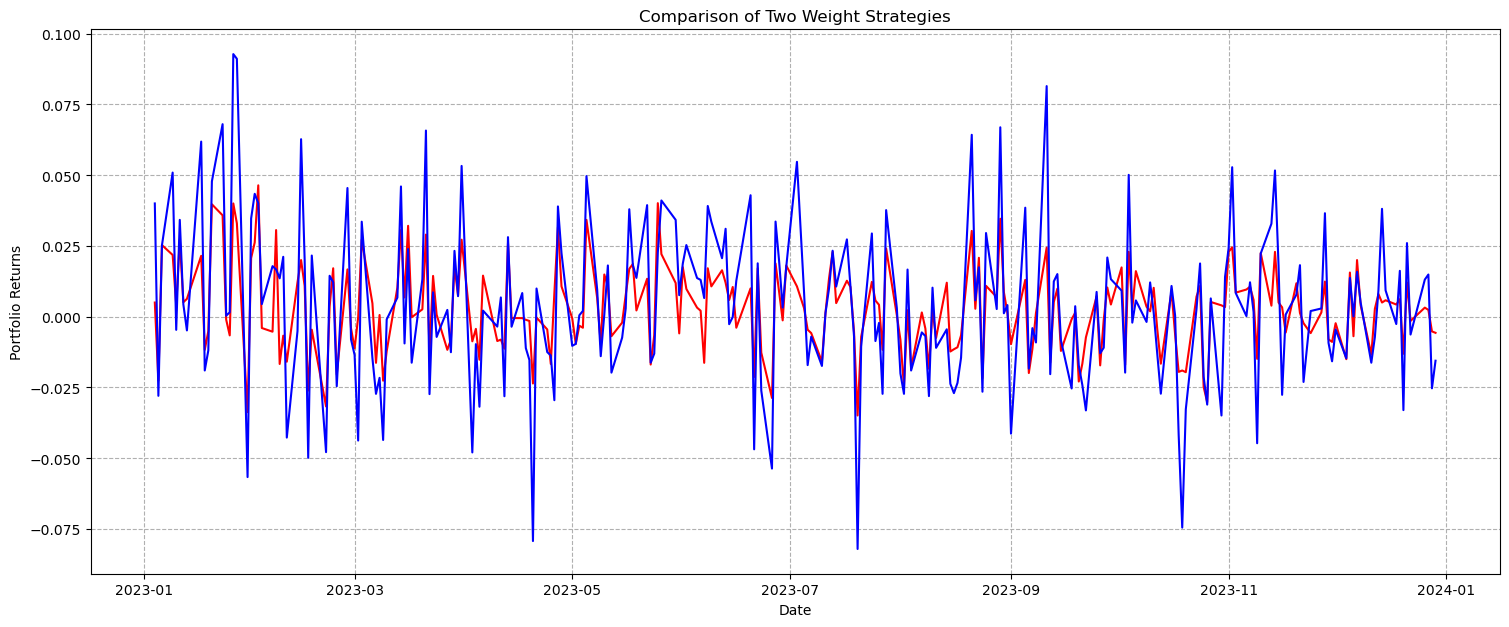

In [11]:
weights_1 = [0.3, 0.2, 0.2, 0.2, 0.1]
weights_2 = [0.05, 0.05, 0.05, 0.8, 0.05]
plt.figure(figsize=(15, 6))

analyse_portfolio(
    tickers = tickers,
    weights = weights_1,
    start_date=start_date,
    end_date=end_date,
    capital = 100000
)       
plt.plot(finaldf.index, finaldf['Portfolio Returns'], color='red')

analyse_portfolio(
    tickers = tickers,
    weights = weights_2,
    start_date=start_date,
    end_date=end_date,
    capital = 100000
)       
plt.plot(finaldf.index, finaldf['Portfolio Returns'], color='blue')
plt.tight_layout()
plt.title('Comparison of Two Weight Strategies')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.grid(True, linestyle='--')
plt.show()

Both portfolios performed badly :(

but the first portfolio (shown in red) performed better than the second, since the line ends up higher (meaning better portfolio returns for red)